#IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [79]:
from google.colab import files
train = files.upload()

In [3]:
from google.colab import files
train = files.upload()

#LOAD DATASETS


In [2]:
train = pd.read_csv('/content/sample_data/Train_Data.csv')
test = pd.read_csv('/content/sample_data/Test_Data.csv')

In [3]:
train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


#EXPLORATORY DATA ANALYSIS(EDA)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [5]:
train.describe(include='all')

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
count,4571,4571,4571,4571,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
unique,212,1,4,70,NaN,NaN,NaN,NaN,NaN
top,30-10-2020,campaign 1,adgroup 3,ad 3,NaN,NaN,NaN,NaN,NaN
freq,35,4571,1672,617,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,92.635747,43.340844,2.800834,1.339094,231.865340
std,NaN,NaN,NaN,NaN,198.349737,100.164913,14.361618,5.223922,1091.742763
min,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,6.000000,2.000000,0.040000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,16.000000,7.000000,0.210000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,84.000000,38.000000,1.350000,1.000000,92.600000


In [6]:
train.drop('campaign',axis=1,inplace=True)

In [7]:
train.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,adgroup 1,ad 2,247,126,1.29,4,925.71


In [8]:
train.shape

(4571, 8)

In [9]:
train['adgroup'].value_counts()

adgroup 3    1672
adgroup 1    1314
adgroup 4     858
adgroup 2     727
Name: adgroup, dtype: int64

#VISSUALIZATIONS

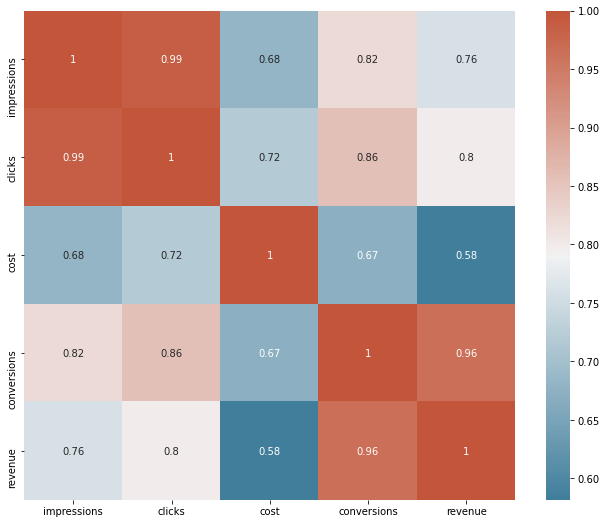

In [10]:
import seaborn as sns
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(train.corr(),annot=True,cmap=cmap)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


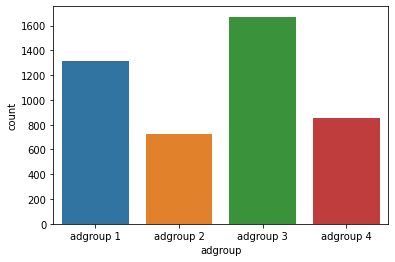

In [11]:
sns.countplot('adgroup',data=train)

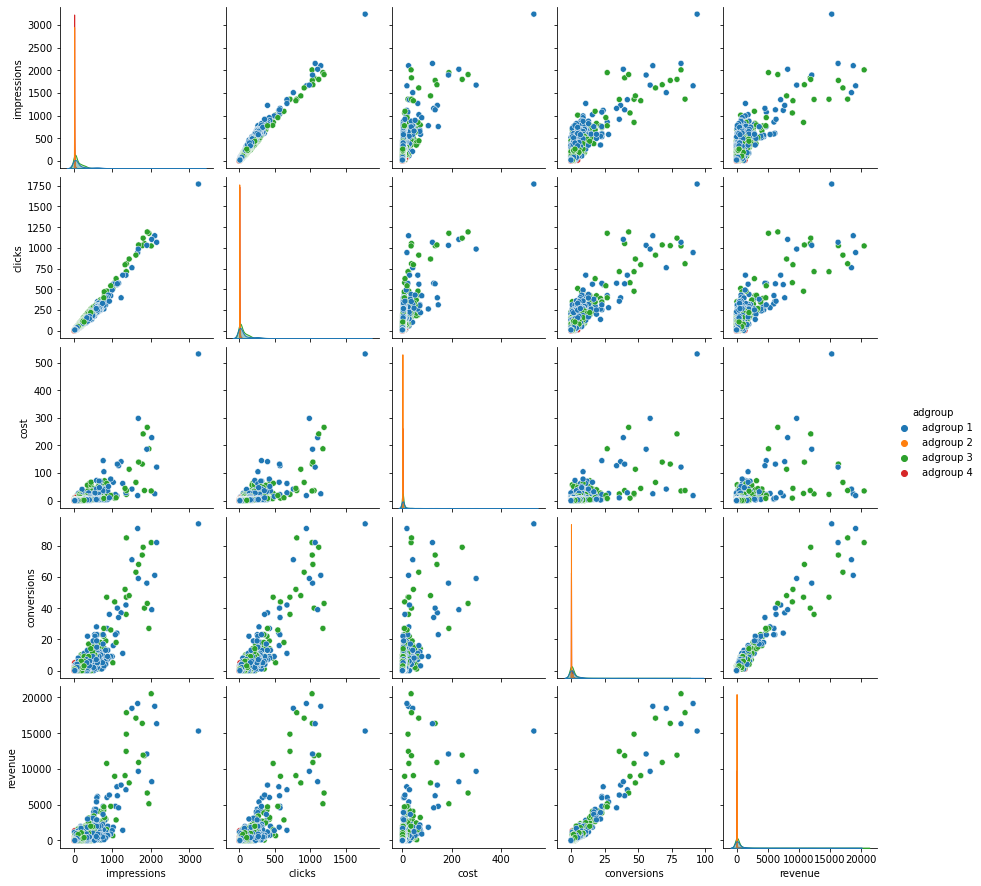

In [12]:
sns.pairplot(train,hue='adgroup')

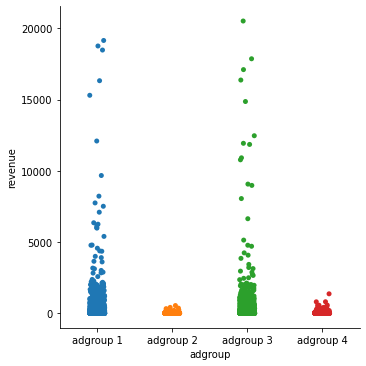

In [13]:
sns.catplot(x='adgroup',y='revenue',data=train)

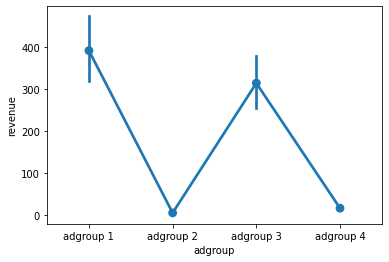

In [14]:
sns.pointplot(x='adgroup',y='revenue',data=train)

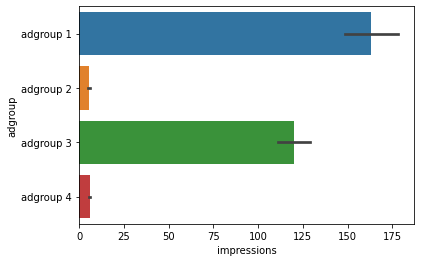

In [15]:
sns.barplot(x='impressions',y='adgroup',data=train)

In [16]:
train2 = pd.pivot_table(train,index=['adgroup'],values=['impressions',	'clicks',	'cost',	'conversions',	'revenue'],aggfunc=np.sum)

In [17]:

train2

,clicks,conversions,cost,impressions,revenue
adgroup,,,,,
adgroup 1,92533,3030,6486.02,213844,515630.85
adgroup 2,1663,27,119.00,4081,3750.27
adgroup 3,101441,2983,5873.71,200428,526427.64
adgroup 4,2474,81,323.88,5085,14047.71


In [18]:
train2 = pd.DataFrame(train2)

In [19]:
train['revenue'] = train['revenue'].astype('int')

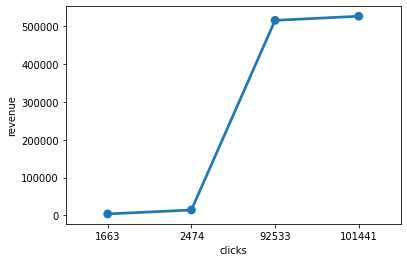

In [20]:
sns.pointplot(x=train2['clicks'],y='revenue',data=train2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


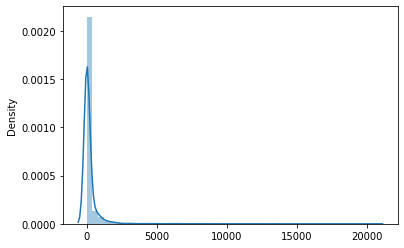

In [21]:
sns.distplot(x=train['revenue'], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


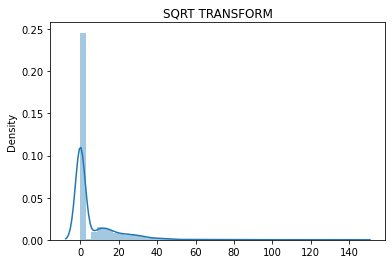

In [22]:
sns.distplot(x=np.sqrt(train['revenue']), kde=True);
plt.title('SQRT TRANSFORM');
plt.show()


In [23]:
train.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,adgroup 1,ad 1,24,6,0.08,0,0
1,01-08-2020,adgroup 2,ad 1,1,0,0.00,0,0
2,01-08-2020,adgroup 3,ad 1,13,4,0.04,0,0
3,01-08-2020,adgroup 4,ad 1,5,4,0.08,0,0
4,01-08-2020,adgroup 1,ad 2,247,126,1.29,4,925


In [24]:
from sklearn.preprocessing import LabelEncoder

#SPLIT DATA SET

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
le = LabelEncoder()

In [27]:
cols = ['adgroup','ad']
#
# Encode labels of multiple columns at once
#
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
train.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,0,0,24,6,0.08,0,0
1,01-08-2020,1,0,1,0,0.00,0,0
2,01-08-2020,2,0,13,4,0.04,0,0
3,01-08-2020,3,0,5,4,0.08,0,0
4,01-08-2020,0,11,247,126,1.29,4,925


In [37]:
train.drop('date',axis=1,inplace=True)

In [38]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(train.drop('revenue',axis = 1), train['revenue'], 
                                                    test_size = 0.2, random_state = 1)

In [39]:
# LET US PRINT THE SHAPES
print(X_train.shape) # Shape of X_train
print(X_test.shape) # Shape of X_test
print(y_train.shape) # Shape of y_train
print(y_test.shape) # Shape of y_test

(3656, 6)
(915, 6)
(3656,)
(915,)


# ML MODELS AND EVALUATION

In [40]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS as Linreg
# Start code
Linreg = LinearRegression()
# End code


# FIT the model on the training data i.e. (X_train, y_train)
# Start Code
Linreg.fit(X_train, y_train)
# End Code


# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT
print("Linear Regression Training mean_square_error is " + str(mean_squared_error(np.square(y_train), np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_squared_error(np.square(y_test), np.square(Linreg.predict(X_test)))))


Linear Regression Training mean_square_error is 30923118241049.96
Linear Regression Testing mean_square_error is 18575323513413.555


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}

In [43]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


mse1 = mean_squared_error(np.square(y_train), reg.predict(X_train))

mse2 = mean_squared_error(np.square(y_test), reg.predict(X_test))
print("The mean squared error (RMSE) on train set: {:.4f}".format(mse1))

print("The mean squared error (RMSE) on test set: {:.4f}".format(mse2))

The mean squared error (RMSE) on train set: 259278951335171.7500
The mean squared error (RMSE) on test set: 227909770442260.2812


In [44]:
#for TEST data

In [45]:
test.head()

,adgroup,ad,cost,impressions,clicks,conversions
0,adgroup 1,ad 1,0.58,121,49,1
1,adgroup 3,ad 1,0.17,22,12,0
2,adgroup 4,ad 1,0.05,5,3,0
3,adgroup 2,ad 1,0.01,2,1,0
4,adgroup 2,ad 2,0.01,3,1,0


In [48]:
test.head()

,adgroup,ad,cost,impressions,clicks,conversions
0,adgroup 1,ad 1,0.58,121,49,1
1,adgroup 3,ad 1,0.17,22,12,0
2,adgroup 4,ad 1,0.05,5,3,0
3,adgroup 2,ad 1,0.01,2,1,0
4,adgroup 2,ad 2,0.01,3,1,0


In [49]:
test.describe(include='all')


,adgroup,ad,cost,impressions,clicks,conversions
count,318,318,318.000000,318.000000,318.000000,318.000000
unique,4,16,NaN,NaN,NaN,NaN
top,adgroup 3,ad 3,NaN,NaN,NaN,NaN
freq,111,44,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.381352,67.144654,29.720126,0.805031
std,NaN,NaN,0.591480,101.078870,45.200014,1.802480
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,0.020000,4.000000,2.000000,0.000000
50%,NaN,NaN,0.105000,20.000000,9.000000,0.000000
75%,NaN,NaN,0.490000,103.000000,40.750000,1.000000


In [50]:
test.isna().sum()


adgroup        0
ad             0
cost           0
impressions    0
clicks         0
conversions    0
dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['adgroup','ad']
#
# Encode labels of multiple columns at once
#
test[cols] = test[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
test.head()

,adgroup,ad,cost,impressions,clicks,conversions
0,0,0,0.58,121,49,1
1,2,0,0.17,22,12,0
2,3,0,0.05,5,3,0
3,1,0,0.01,2,1,0
4,1,2,0.01,3,1,0


#predictions

In [52]:
predictions = Linreg.predict(test)

In [53]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index 
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>